In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# EMNS

In [55]:
emns_df = pd.read_csv("./data/EMNS/wav_metadata.csv")
emns_df.drop(
    [
        "id",
        "description",
        "date_created",
        "status",
        "level",
        "gender",
        "age",
        "user_id",
    ],
    axis=1,
    inplace=True,
)
emns_df.head()

,utterance,emotion,audio_recording
0,Hannu wrote of his expedition in stone.,Sarcastic,recorded_audio_A0MwoOW.wav
1,Little India differs from many other neighbour...,Excited,recorded_audio_nZB5ujA.wav
2,Users had the ability to vote on the songs the...,Neutral,recorded_audio.wav
3,"His major sponsor is Algario Communications, a...",Surprised,recorded_audio_6emr1kD.wav
4,The mansion also has a marriage office.,Sarcastic,recorded_audio_ReBGM47.wav


In [56]:
emotions_count_emns = emns_df["emotion"].value_counts()
print(emotions_count)

emotion
Disgust      162
Happy        157
Surprised    151
Excited      150
Neutral      149
Sad          147
Sarcastic    139
Angry        126
Name: count, dtype: int64


# ESD

In [57]:
column_names = ["audio", "text", "emotion"]
speakers = ["11", "12", "13", "14", "15", "16", "17", "18", "19", "20"]
esd_df = pd.DataFrame()


def rename_wav(audio):
    return audio[:4] + "/" + audio + ".wav"


for i in speakers:
    tmp_df = pd.read_csv(
        f"/home/xzodia/dev/emo-gan/data/ESD/00{i}/00{i}.txt",
        sep="\t",
        names=column_names,
    )

    tmp_df["emotion"] = tmp_df["emotion"].replace("Surprise", "Surprised")
    tmp_df = tmp_df[["text", "emotion", "audio"]]
    tmp_df["audio"] = tmp_df["audio"].apply(rename_wav)
    tmp_df["speaker"] = int(i)

    esd_df = pd.concat([esd_df, tmp_df], axis=0).reset_index(drop=True)

esd_df.head()

,text,emotion,audio,speaker
0,"The nine the eggs, I keep.",Neutral,0011/0011_000001.wav,11
1,"I did go, and made many prisoners.",Neutral,0011/0011_000002.wav,11
2,That I owe my thanks to you.,Neutral,0011/0011_000003.wav,11
3,They went up to the dark mass job had pointed ...,Neutral,0011/0011_000004.wav,11
4,Clear than clear water!,Neutral,0011/0011_000005.wav,11


In [58]:
emotions_count_mns = esd_df["emotion"].value_counts()
print(emotions_count_mns)

emotion
Neutral      3500
Angry        3500
Happy        3500
Sad          3500
Surprised    3500
Name: count, dtype: int64


# Comparison

In [59]:
datasets = ["ESD", "EMNS"]
sizes = [esd_df.shape[0], emns_df.shape[0]]

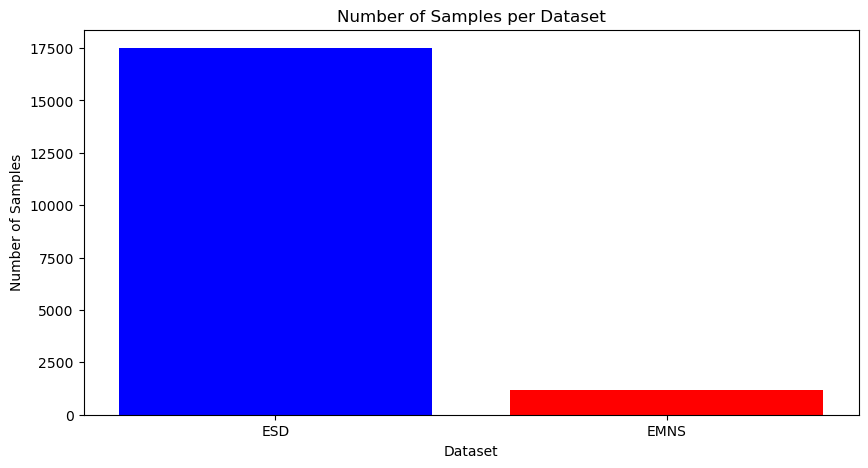

In [60]:
plt.figure(figsize=(10, 5))
plt.bar(datasets, sizes, color=["blue", "red"])

plt.title("Number of Samples per Dataset")
plt.xlabel("Dataset")
plt.ylabel("Number of Samples")
plt.show()

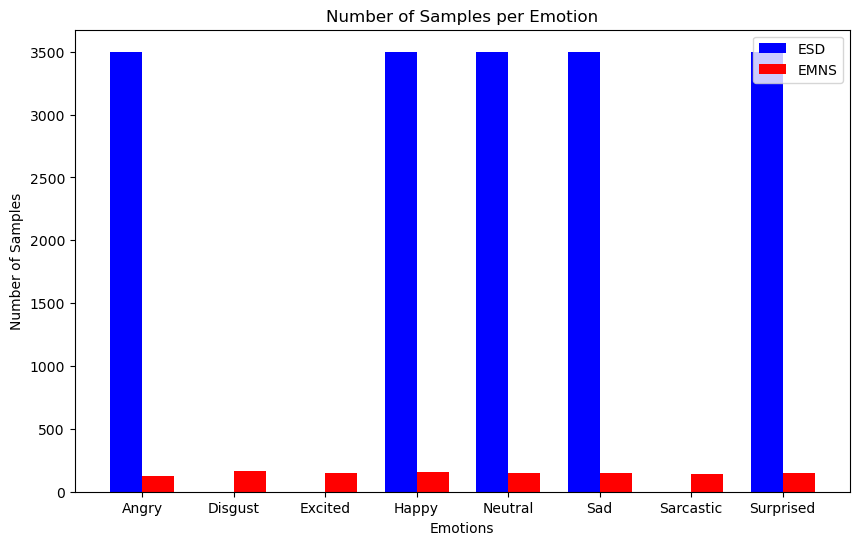

In [62]:
all_categories = emotions_count_esd.index.union(emotions_count_emns.index)
emotions_count_esd = emotions_count_esd.reindex(all_categories, fill_value=0)
emotions_count_emns = emotions_count_emns.reindex(all_categories, fill_value=0)


fig, ax = plt.subplots(figsize=(10, 6))
ind = np.arange(len(all_categories))
width = 0.35

bars1 = ax.bar(ind - width/2, emotions_count_esd, width, label=datasets[0], color="blue")
bars2 = ax.bar(ind + width/2, emotions_count_emns, width, label=datasets[1], color="red")

ax.set_xlabel("Emotions")
ax.set_ylabel("Number of Samples")
ax.set_title("Number of Samples per Emotion")
ax.set_xticks(ind)
ax.set_xticklabels(all_categories)
ax.legend()
plt.show()

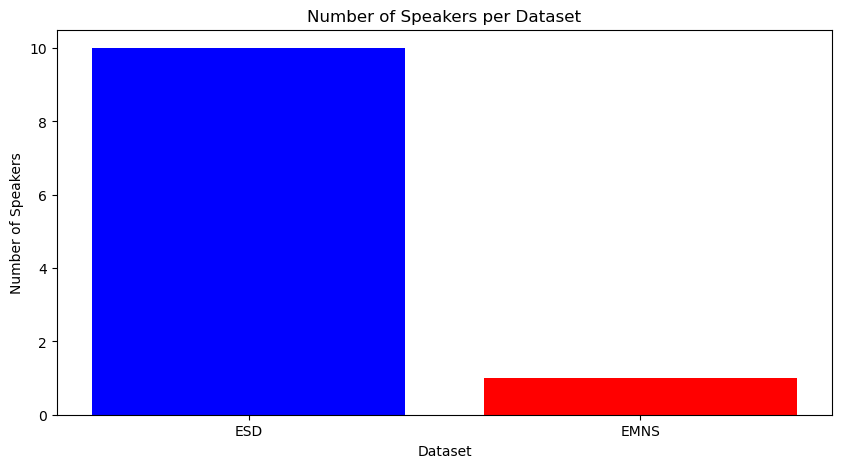

In [68]:
    esd_speakers = esd_df["speaker"].value_counts()
    speakers = [len(esd_speakers), 1]

    plt.figure(figsize=(10, 5))
    plt.bar(datasets, speakers, color=["blue", "red"])

    plt.title("Number of Speakers per Dataset")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Speakers")
    plt.show()
